# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets
from tabulate import tabulate
from prettytable import PrettyTable
import random
from scipy import stats
%matplotlib inline

## Simple scatterplot

Construindo dados

In [2]:
random_n1 = list(np.random.normal(18, 10, 100))
random_n2 = list(np.random.normal(33, 10, 100))
random_n3 = list(np.random.normal(50, 10, 100))

In [3]:
x = []
y = []
n_samples = 1000
for n in range(0,100):
    for _ in range(n_samples):
        if n < 20:
            x.append(n + random.sample(random_n1,1)[0])
            y.append(n + random.sample(random_n1,1)[0])
        elif n < 40:
            x.append(n + random.sample(random_n2,1)[0])
            y.append(n + random.sample(random_n2,1)[0])
        elif n < 60:
            x.append(n + random.sample(random_n3,1)[0])
            y.append(n + random.sample(random_n3,1)[0])
        elif n < 80:
            x.append(n + random.sample(random_n2,1)[0])
            y.append(n + random.sample(random_n2,1)[0])
        else:
            x.append(n + random.sample(random_n1,1)[0])
            y.append(n + random.sample(random_n1,1)[0])

### Plot simples

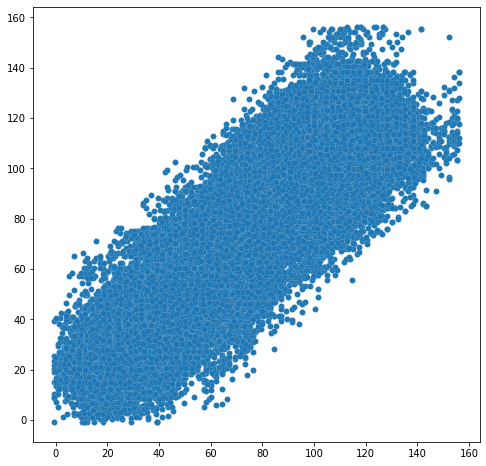

In [4]:
f, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(y, x, alpha = 1,linewidth=0.1)

### Há algum padrão?

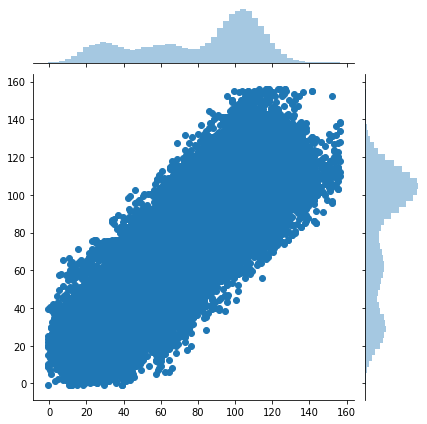

In [5]:
sns.jointplot(y, x, alpha = 1)

### Há três picos no histograma

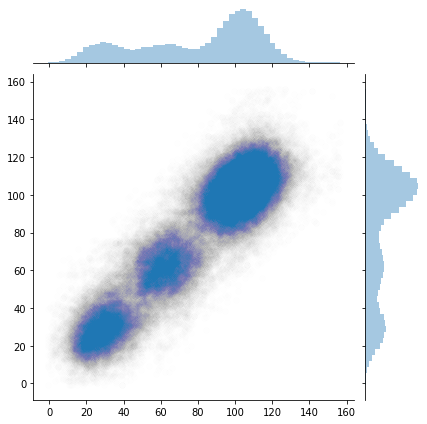

In [6]:
sns.jointplot(y, x, alpha = 0.002)

### Uma mudança sútil na visualização permite identificar padrões antes escondidos

## Como identificar padrões?

In [7]:
n_samples = 10000
X,y  = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

In [8]:
data = pd.DataFrame(X, columns = ['x', 'y'])
data['target'] = y

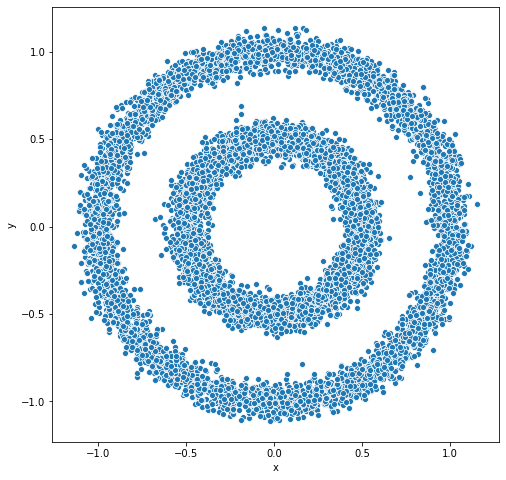

In [9]:
f, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'x', y = 'y',data = data, alpha = 1)

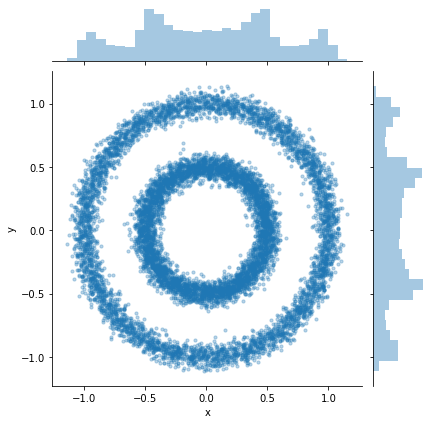

In [10]:
sns.jointplot(x = 'x', y = 'y',data = data, s = 10, alpha = 0.3)

### Como separar os dados em dois grupos?

### Quais métodos?

### As vezes não precisamos utilizar métodos complexos e custosos computacionalmente

#### Compreender o problema é o primeiro passo para uma boa análise.

In [11]:
data['dist'] = np.sqrt(data['x']**2 + data['y']**2)

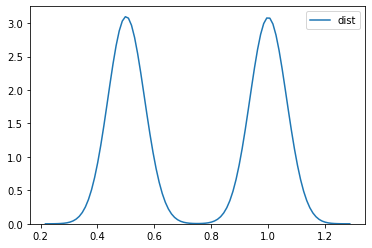

In [12]:
sns.kdeplot(data['dist'])

In [13]:
data['color'] = 'red'
data.loc[data['dist'] <= data['dist'].mean(), 'color'] = 'blue'

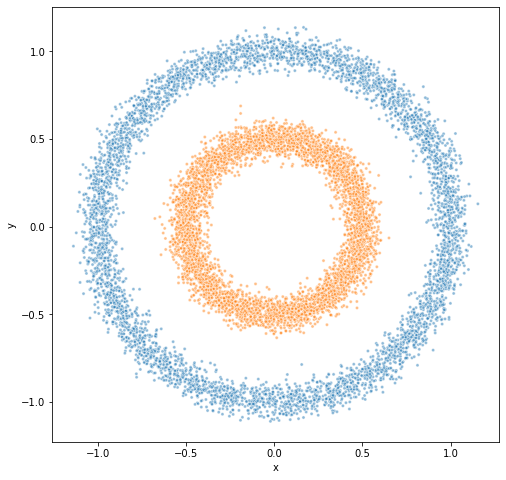

In [14]:
f, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'x', y = 'y',data = data, s = 10, alpha = 0.5, hue = 'color',legend=False)

In [15]:
data['yhat'] = data['dist'].map(lambda x: 1 if x < data['dist'].mean() else 0,1)

In [16]:
def acc(target, yhat):
    total = 0
    for n in range(len(target)):
        if target[n] == yhat[n]:
            total +=1
        else:
            pass
    return (total/len(target))*100

In [17]:
acc(data['yhat'], data['target'])

100.0

### Com uma distância euclidiana conseguimos 100% de acurácia!

## Iris dataset

### Load data

In [18]:
iris = pd.read_csv('./Iris.csv')
iris.drop(columns = 'Id', inplace = True)

In [19]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# 
print(f'''
Número de amostras: {iris.shape[0]}
Número de colunas : {iris.shape[1]}''')


Número de amostras: 150
Número de colunas : 5


### Que tipo de dados?

In [21]:
# Nome das colunas

table = PrettyTable()
table.field_names = ['Index', 'Column Name']
for i,name in enumerate(list(iris.columns)):
    table.add_row([i, name])
print(table)

+-------+---------------+
| Index |  Column Name  |
+-------+---------------+
|   0   | SepalLengthCm |
|   1   |  SepalWidthCm |
|   2   | PetalLengthCm |
|   3   |  PetalWidthCm |
|   4   |    Species    |
+-------+---------------+


In [22]:
dtype = iris.dtypes.reset_index()
dtype.columns = ['Column Name', 'data type']
print(tabulate(dtype, headers='keys', tablefmt='psql'))

+----+---------------+-------------+
|    | Column Name   | data type   |
|----+---------------+-------------|
|  0 | SepalLengthCm | float64     |
|  1 | SepalWidthCm  | float64     |
|  2 | PetalLengthCm | float64     |
|  3 | PetalWidthCm  | float64     |
|  4 | Species       | object      |
+----+---------------+-------------+


### O que é species?

In [23]:
# Nome das colunas

table = PrettyTable()
table.field_names = ['Index', 'Specie']
for i,specie in enumerate(list(iris['Species'].unique())):
    table.add_row([i, specie])
print(table)

+-------+-----------------+
| Index |      Specie     |
+-------+-----------------+
|   0   |   Iris-setosa   |
|   1   | Iris-versicolor |
|   2   |  Iris-virginica |
+-------+-----------------+


**Três espécies diferentes**

### Quantidade de amostras por espécies

In [24]:
qtd_species = iris.groupby('Species').size().reset_index()
qtd_species.columns = ['Species', 'quantidade']
print(tabulate(qtd_species, headers='keys', tablefmt='psql'))

+----+-----------------+--------------+
|    | Species         |   quantidade |
|----+-----------------+--------------|
|  0 | Iris-setosa     |           50 |
|  1 | Iris-versicolor |           50 |
|  2 | Iris-virginica  |           50 |
+----+-----------------+--------------+


**Dataset bem distribuído entre as amostras**

In [25]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### Gráfico de barras

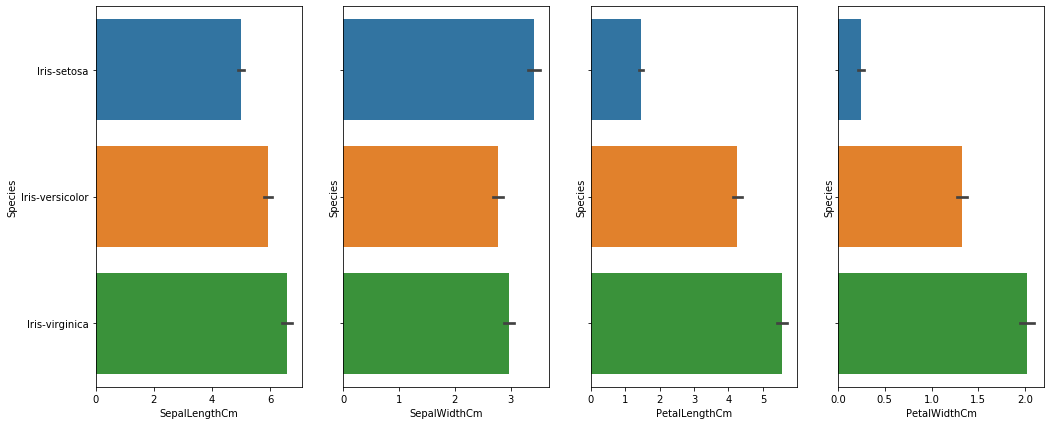

In [26]:
fig, ax = plt.subplots(1,4, figsize = (17,7), sharey = True)
for n, col in enumerate(list(iris.columns)[0:4]):
    sns.barplot( x = col, y = 'Species', data = iris, ax = ax[n])



### Problemas com o gráfico de barras

In [27]:
random_bar1 = list(np.random.normal(100, 10, 100))
random_bar2 = list(np.random.normal(50, 15, 50))
random_bar2 += list(np.random.normal(150, 15, 50))


In [28]:
random_df = pd.DataFrame({1: random_bar1,
             2: random_bar2}).melt()

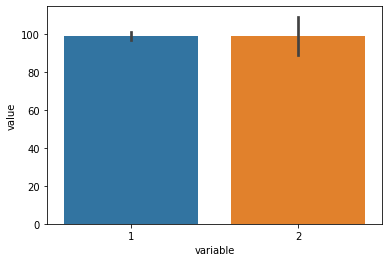

In [29]:
sns.barplot(x = 'variable', y = 'value', data = random_df)

#### Aparentemente as distribuições são semelhantes

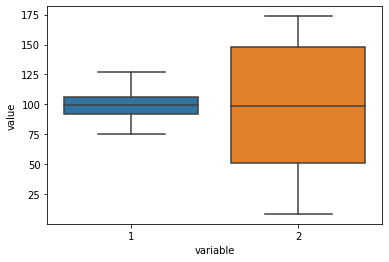

In [30]:
sns.boxplot(x = 'variable', y = 'value', data = random_df)

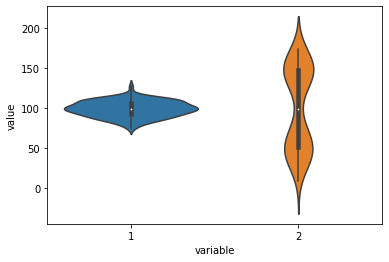

In [31]:
sns.violinplot(x = 'variable', y = 'value', data = random_df)

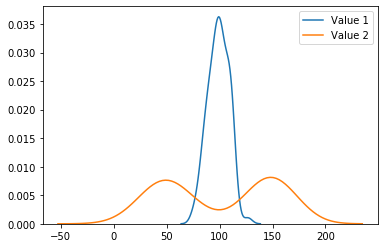

In [32]:
sns.kdeplot(data = random_df[random_df.variable == 1]['value'], label = 'Value 1')
sns.kdeplot(data = random_df[random_df.variable == 2]['value'], label = 'Value 2')

### A importância de visualizar se os dados são normais ou não

Se assumirmos que a distribuição é normal o teste mais obvio seria o test t.

Porém uma pergunta melhor seria se as distribuições são semelhantes ou não assumindo que elas não são normais.

Aplicando dessa forma o teste de Kolmogorov–Smirnov

In [33]:
print(f't-test                 : {stats.ttest_ind(random_bar1, random_bar2)[1]:.2f}')
print(f'Kolmogorov–Smirnov test: {stats.ks_2samp(random_bar1, random_bar2)[1]:.2e}')

t-test                 : 1.00
Kolmogorov–Smirnov test: 8.08e-11


### Histogramas

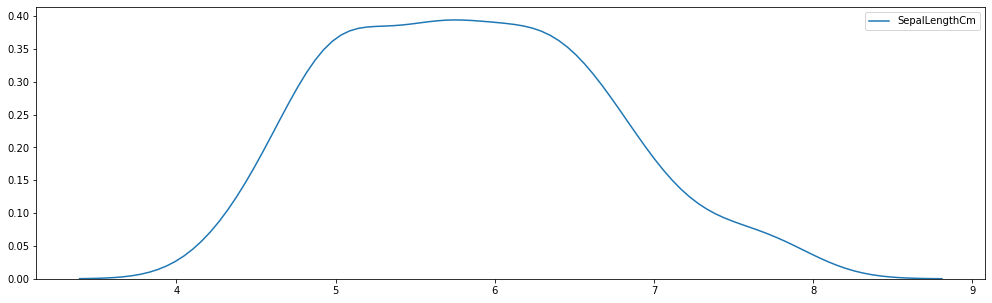

In [34]:
fig, ax = plt.subplots(figsize = (17,5))
sns.kdeplot(iris.SepalLengthCm)

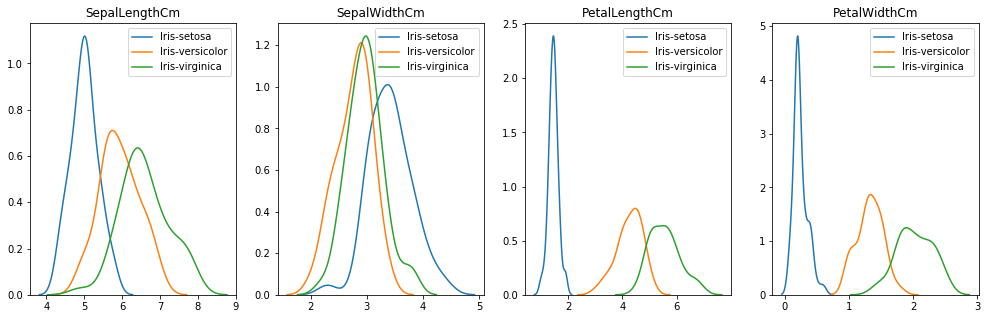

In [35]:
fig, ax = plt.subplots(1,4, figsize = (17,5))
for n, col in enumerate(list(iris.columns)[0:4]):
    sns.kdeplot(data = iris[iris.Species == iris.Species.unique()[0]][col],ax = ax[n], label = iris.Species.unique()[0])
    sns.kdeplot(data = iris[iris.Species == iris.Species.unique()[1]][col], ax = ax[n], label = iris.Species.unique()[1])
    sns.kdeplot(data = iris[iris.Species == iris.Species.unique()[2]][col], ax = ax[n], label = iris.Species.unique()[2])
    ax[n].title.set_text(col)

### Boxplots, violinplots e swarmplots

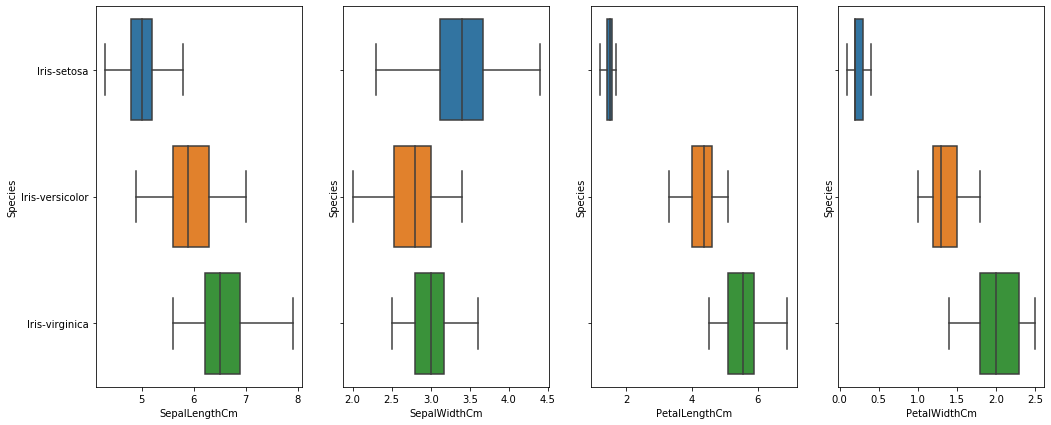

In [36]:
fig, ax = plt.subplots(1,4, figsize = (17,7), sharey = True)
for n, col in enumerate(list(iris.columns)[0:4]):
    sns.boxplot( x = col, y = 'Species', data = iris, ax = ax[n],showfliers=False)



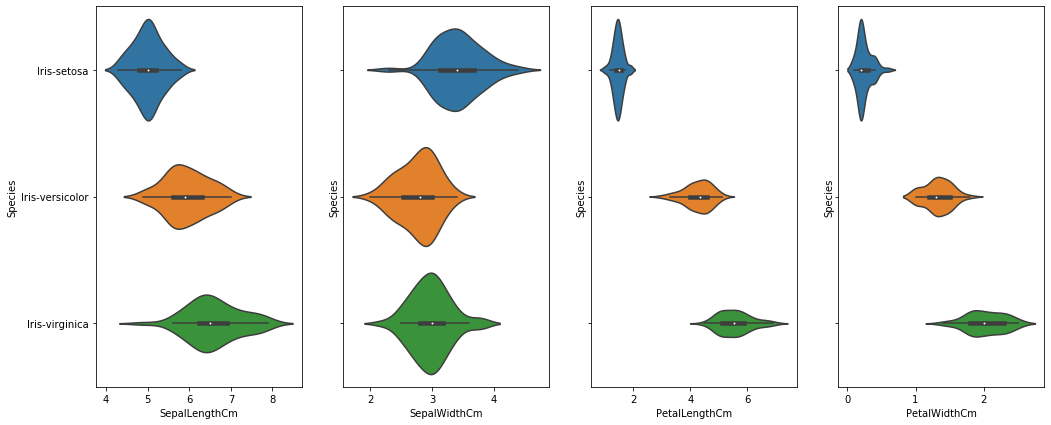

In [37]:
fig, ax = plt.subplots(1,4, figsize = (17,7), sharey = True)
for n, col in enumerate(list(iris.columns)[0:4]):
    sns.violinplot( x = col, y = 'Species', data = iris, ax = ax[n],showfliers=False)



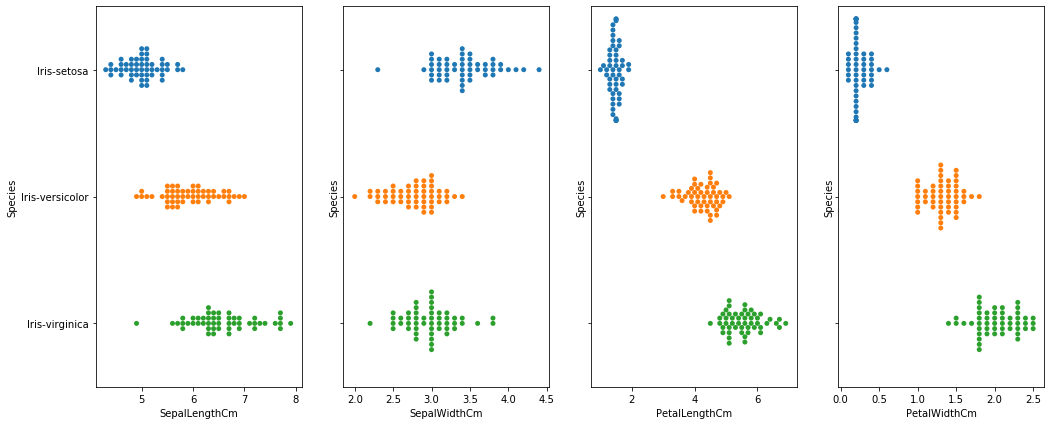

In [38]:
fig, ax = plt.subplots(1,4, figsize = (17,7), sharey = True)
for n, col in enumerate(list(iris.columns)[0:4]):
    sns.swarmplot( x = col, y = 'Species', data = iris, ax = ax[n])



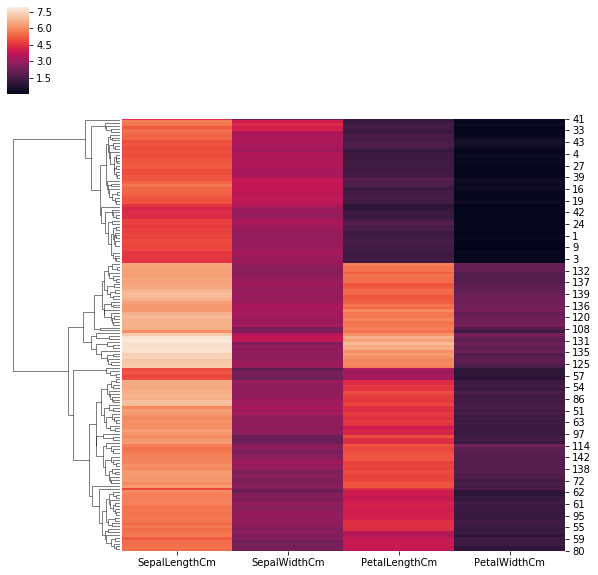

In [39]:
a = sns.clustermap(iris.drop(columns = 'Species'), col_cluster = False)

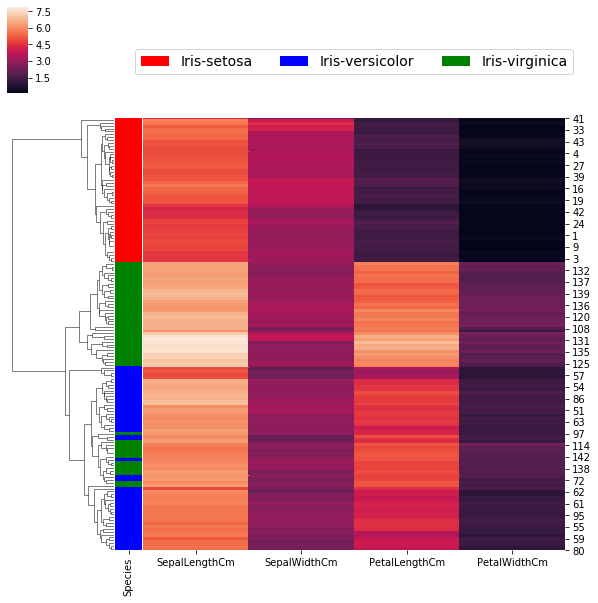

In [41]:
lut = dict(zip(iris['Species'].unique(), "rbg"))
row_colors = iris['Species'].map(lut)
g = sns.clustermap(iris.drop(columns = 'Species'), col_cluster = False, row_colors= row_colors)

for label in iris['Species'].unique():
    g.ax_col_dendrogram.bar(0, 0, color=lut[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6, fontsize = 14)

### Normalizando os dados por z-score

**z = (x – μ) / σ**

In [42]:
iris_norm = iris.copy()

In [43]:
for col in list(iris_norm.columns)[0:4]:
    iris_norm[col + '_z'] = stats.zscore(iris_norm[col])


In [44]:
iris_norm.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'SepalLengthCm_z', 'SepalWidthCm_z', 'PetalLengthCm_z',
       'PetalWidthCm_z'],
      dtype='object')

In [45]:
iris_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333e+00,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.0,3.054000e+00,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.0,3.758667e+00,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.0,1.198667e+00,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000
SepalLengthCm_z,150.0,-4.736952e-16,1.003350,-1.870024,-0.900681,-0.052506,0.674501,2.492019
SepalWidthCm_z,150.0,-6.631732e-16,1.003350,-2.438987,-0.587764,-0.124958,0.569251,3.114684
PetalLengthCm_z,150.0,3.315866e-16,1.003350,-1.568735,-1.227541,0.336266,0.762759,1.786341
PetalWidthCm_z,150.0,-2.842171e-16,1.003350,-1.444450,-1.181504,0.133226,0.790591,1.710902


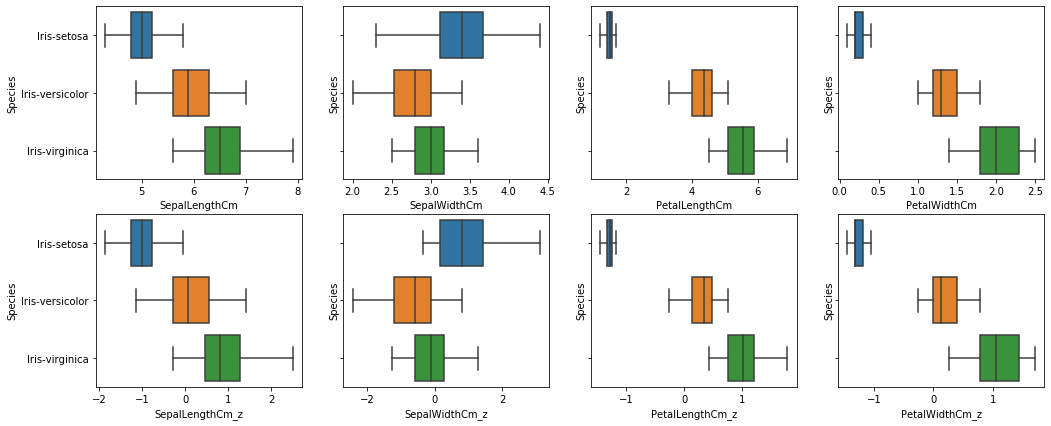

In [46]:
fig, ax = plt.subplots(2,4, figsize = (17,7), sharey = True)
for y in range(2):
    if y == 0:
        d = iris
    else: d = iris_norm
    for n, col in enumerate(list(iris_norm.columns)[-4:]):
        if y == 0:
            col = col.replace('_z', '')
        sns.boxplot( x = col, y = 'Species', data = d, ax = ax[y][n],showfliers=False)

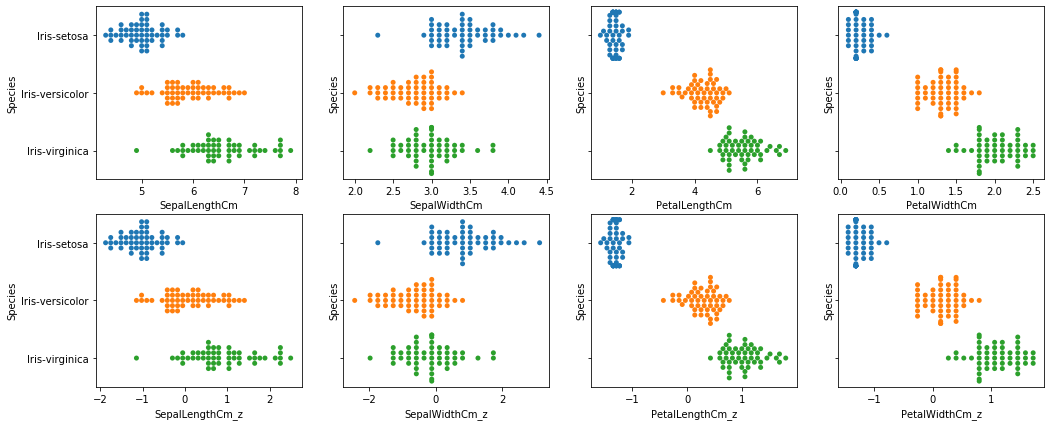

In [47]:
fig, ax = plt.subplots(2,4, figsize = (17,7), sharey = True)
for y in range(2):
    if y == 0:
        d = iris
    else: d = iris_norm
    for n, col in enumerate(list(iris_norm.columns)[-4:]):
        if y == 0:
            col = col.replace('_z', '')
        sns.swarmplot( x = col, y = 'Species', data = d, ax = ax[y][n])

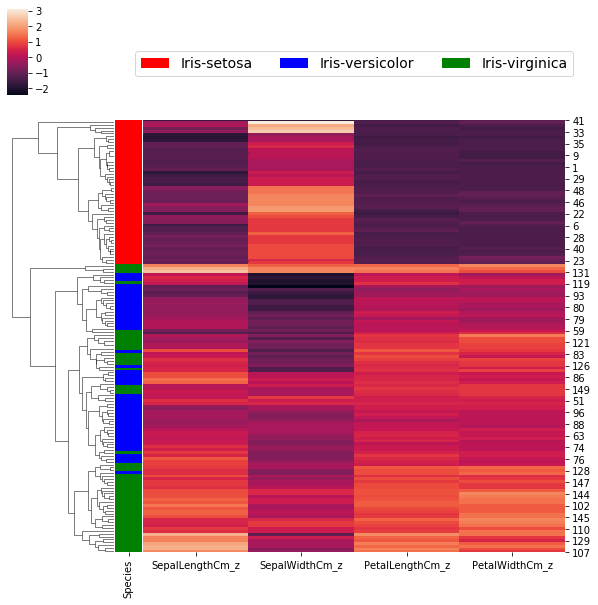

In [48]:
lut = dict(zip(iris['Species'].unique(), "rbg"))
row_colors = iris_norm['Species'].map(lut)
g = sns.clustermap(iris_norm.drop(columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']), col_cluster = False, row_colors= row_colors)

for label in iris_norm['Species'].unique():
    g.ax_col_dendrogram.bar(0, 0, color=lut[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6, fontsize = 14)

### Normalizando de forma diferente

In [49]:
iris_norm2 = iris.copy()
for col in list(iris_norm2.columns)[0:4]:
    iris_norm2[col + '_norm'] = iris_norm2[col]/iris_norm2[col].sum()


In [50]:
iris_norm2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_norm,SepalWidthCm_norm,PetalLengthCm_norm,PetalWidthCm_norm
0,5.1,3.5,1.4,0.2,Iris-setosa,0.005819,0.007640,0.002483,0.001112
1,4.9,3.0,1.4,0.2,Iris-setosa,0.005590,0.006549,0.002483,0.001112
2,4.7,3.2,1.3,0.2,Iris-setosa,0.005362,0.006985,0.002306,0.001112
3,4.6,3.1,1.5,0.2,Iris-setosa,0.005248,0.006767,0.002661,0.001112
4,5.0,3.6,1.4,0.2,Iris-setosa,0.005705,0.007859,0.002483,0.001112


In [51]:
iris_norm2.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.0,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.0,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.0,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000
SepalLengthCm_norm,150.0,0.006667,0.000945,0.004906,0.005819,0.006617,0.007302,0.009013
SepalWidthCm_norm,150.0,0.006667,0.000947,0.004366,0.006112,0.006549,0.007204,0.009605
PetalLengthCm_norm,150.0,0.006667,0.003130,0.001774,0.002838,0.007716,0.009046,0.012238
PetalWidthCm_norm,150.0,0.006667,0.004244,0.000556,0.001669,0.007230,0.010011,0.013904


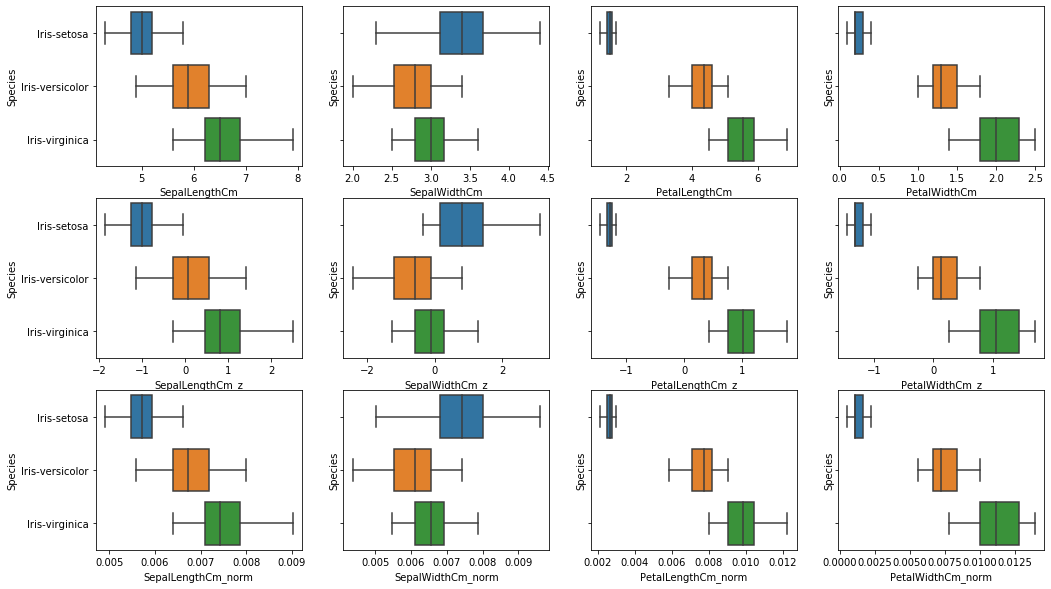

In [52]:
fig, ax = plt.subplots(3,4, figsize = (17,10), sharey = True)
for y in range(3):
    if y == 0:
        d = iris
    elif y == 1:
        d = iris_norm
    else: d = iris_norm2
    for n, col in enumerate(list(iris_norm.columns)[-4:]):
        if y == 0:
            col = col.replace('_z', '')
        if y == 2:
            col = col.replace('_z', '_norm')
        sns.boxplot( x = col, y = 'Species', data = d, ax = ax[y][n],showfliers=False)

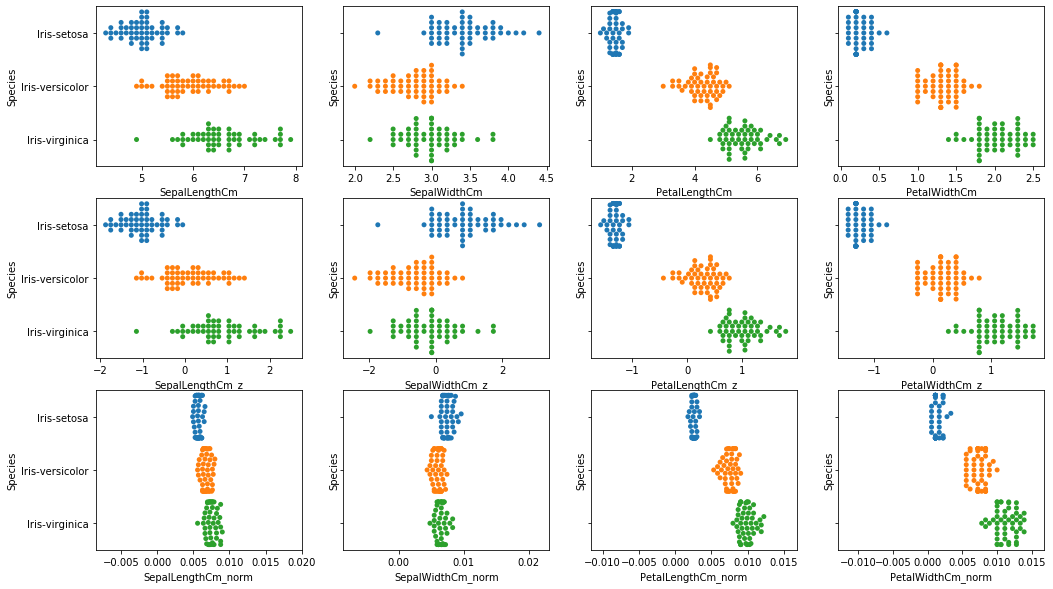

In [53]:
fig, ax = plt.subplots(3,4, figsize = (17,10), sharey = True)
for y in range(3):
    if y == 0:
        d = iris
    elif y == 1:
        d = iris_norm
    else: d = iris_norm2
    for n, col in enumerate(list(iris_norm.columns)[-4:]):
        if y == 0:
            col = col.replace('_z', '')
        if y == 2:
            col = col.replace('_z', '_norm')
        sns.swarmplot( x = col, y = 'Species', data = d, ax = ax[y][n])

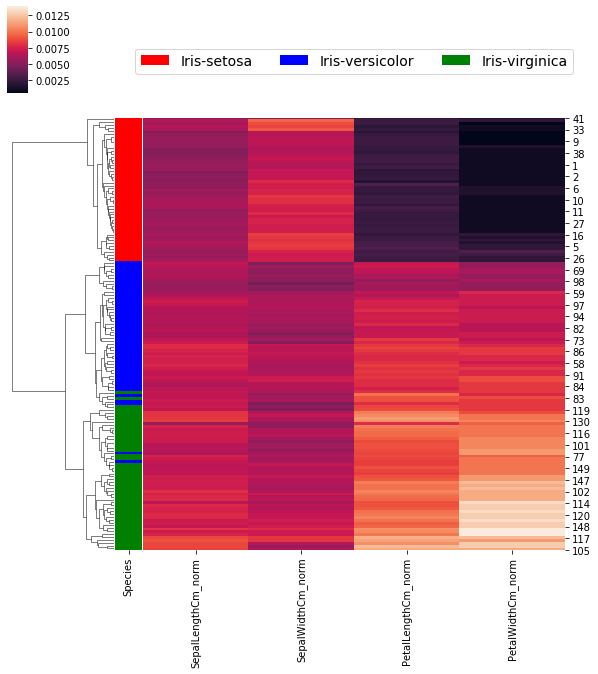

In [54]:
lut = dict(zip(iris['Species'].unique(), "rbg"))
row_colors = iris_norm['Species'].map(lut)
g = sns.clustermap(iris_norm2.drop(columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']), col_cluster = False, row_colors= row_colors)

for label in iris_norm['Species'].unique():
    g.ax_col_dendrogram.bar(0, 0, color=lut[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6, fontsize = 14)

### O início de uma análise multivariada...

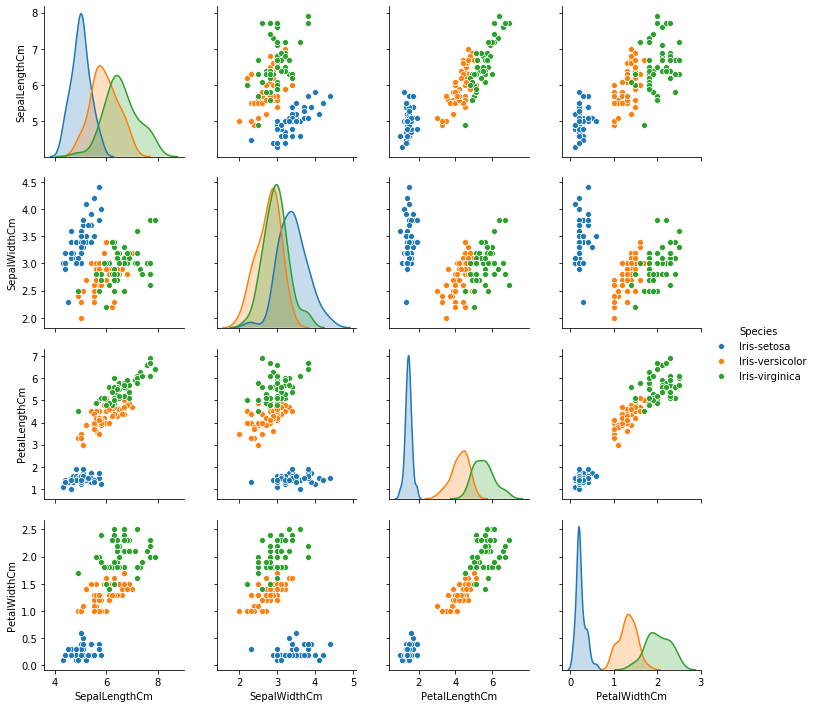

In [55]:
sns.pairplot(iris, hue="Species")

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.